In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import seaborn as sns
#sns.set()

In [2]:
data = pd.read_csv('daa.csv')
data
#data.head()
#data.describe()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [3]:
# Dependent Variable 
y = data['price']
# Independent Variable
x1 = data['size']

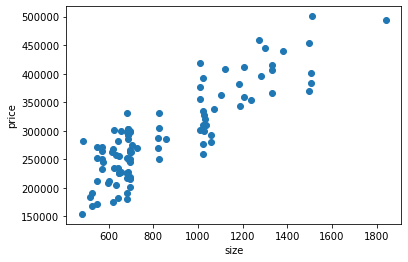

In [4]:
plt.scatter(x1, y)
plt.xlabel('size')
plt.ylabel('price')
plt.show()

In [5]:
# Regression Equation 
# yhat = b0 + b1*x1

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sat, 07 May 2022   Prob (F-statistic):           8.13e-31
Time:                        16:54:44   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

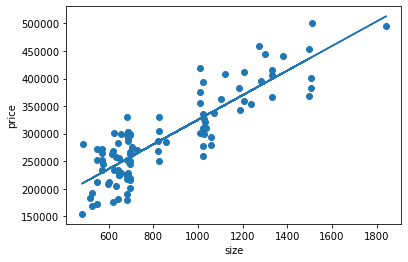

In [6]:
plt.scatter(x1, y)
yhat = 223.1787*x1 + 1.019e+05
fig = plt.plot(x1, yhat) 
plt.xlabel('size')
plt.ylabel('price')
plt.show()

In [7]:
new_data = pd.DataFrame({'const':1, 'size': [1700, 1650]})
new_data = new_data[['const', 'size']]

predictions = results.predict(new_data)

pre_df = pd.DataFrame({'Predictions': predictions})
new_data = new_data.join(pre_df)

new_data

,const,size,Predictions
0,1,1700,481316.464212
1,1,1650,470157.527082
